In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data_path = "./data/"
data_files = {
  "Family":              "familyxx.csv",
  "Household":           "househld.csv",
  "Injury Episode":      "injpoiep.csv",
  "Person":              "personsx.csv",
  "Sample Child":        "samchild.csv",
  "Sample Adult":        "samadult.csv",
  "Sample Adult Cancer": "cancerxx.csv"
}

In [3]:
df = pd.read_csv(data_path + data_files["Person"])

In [4]:
military_indices = (
    (df.ARMFTM1P == 1) | # US military 2001 - ????
    (df.ARMFTM2P == 1) | # US military 1990 - 2001
    (df.ARMFTM3P == 1) | # US military 1975 - 1990
    (df.ARMFTM4P == 1) | # US military 1964 - 1975
    (df.ARMFTM5P == 1) | # US military 1955 - 1964
    (df.ARMFTM6P == 1) | # US military 1950 - 1955
    (df.ARMFTM7P == 1)   # US military ???? - 1950
)
was_military = df[ military_indices]
not_military = df[~military_indices]
len(was_military), len(not_military)

(6863, 96926)

In [5]:
def get_incomes(df):
    return df[              # people who
        (df.WRKLYR1 == 1) & # worked last year
        (df.ERNYR_P < 12)   # and reported their earnings
    ].ERNYR_P               # were in these income brackets

In [6]:
y_incomes = get_incomes(was_military)
n_incomes = get_incomes(not_military)

In [7]:
y_i, y_v = y_incomes.value_counts().index, y_incomes.value_counts().values
n_i, n_v = n_incomes.value_counts().index, n_incomes.value_counts().values
y_v = y_v / y_v.max().astype(float)
n_v = n_v / n_v.max().astype(float)

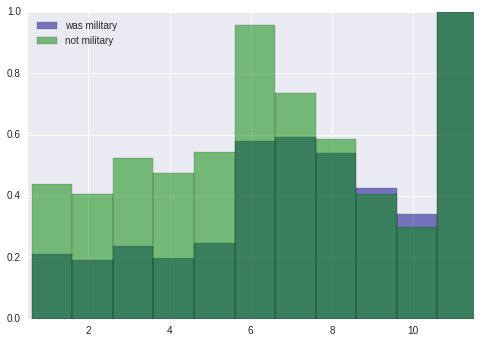

In [8]:
plt.xlim(0.5, 11.5)
plt.bar(y_i - 0.4, y_v, label = "was military", width = 1, color = "#000088", alpha = 0.5)
plt.bar(n_i - 0.4, n_v, label = "not military", width = 1, color = "#008800", alpha = 0.5)
plt.legend(loc = "best")

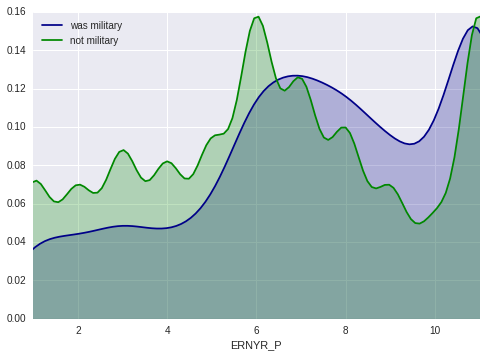

In [9]:
plt.xlim(1, 11)
sns.distplot(y_incomes, label = "was military", color = "#000088", hist = False, kde_kws = {"shade": True}, norm_hist = True)
sns.distplot(n_incomes, label = "not military", color = "#008800", hist = False, kde_kws = {"shade": True}, norm_hist = True)
plt.legend(loc = "best")